In [42]:
import pickle
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt

# Andiamo a caricare le serie temporali degli indici vigitali

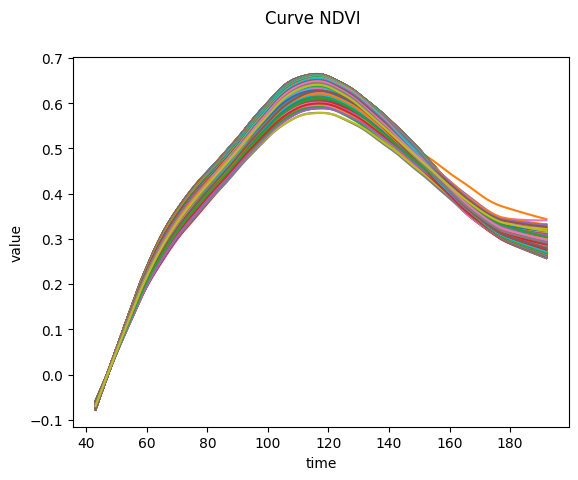

In [8]:
with open('./pickles/ndvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
NDVI.plot()
print() #fix duplicate plot

# Esempio di clustering

In [36]:
X = random_walks(n_ts=5000, sz=32, d=1)

print(NDVI.data_matrix.shape)

(1579, 150, 1)


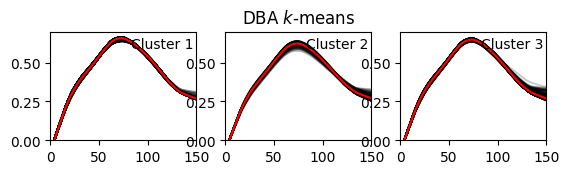

In [50]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0)
y_pred = km.fit_predict(NDVI.data_matrix)

img = plt.figure()

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in NDVI.data_matrix[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, NDVI.data_matrix.shape[1])
    plt.ylim(0, 0.7)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

In [30]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                          max_iter_barycenter=5,
                          random_state=0).fit(X)

In [31]:
km_dba.cluster_centers_.shape

(3, 32, 1)

In [18]:
km_sdtw = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5,
                           max_iter_barycenter=5,
                           metric_params={"gamma": .5},
                           random_state=0).fit(X)

In [19]:
km_sdtw.cluster_centers_.shape

(3, 32, 1)

In [23]:
X_bis = to_time_series_dataset([[1, 2, 3, 4],
                                [1, 2, 3],
                                [2, 5, 6, 7, 8, 9]])
km = TimeSeriesKMeans(n_clusters=2, max_iter=5,
                      metric="dtw", random_state=0).fit(X_bis)

In [24]:
km.cluster_centers_.shape

(2, 6, 1)